In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from scipy.linalg import circulant
from numpy import linalg as LA
import preprocess as pr 
from keras.preprocessing import sequence
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Conv1D,MaxPooling1D,Flatten,LSTM,Dropout,BatchNormalization,Activation
from sklearn.preprocessing import normalize
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
os.chdir("/Polycarbon/hand Motion Clasification")

# Top 5 gesture

gesture 1,5,6,9,10

In [3]:
class_num=[1,5,6,9,10]

In [4]:
def read_in_folder(folder_path,gesture_num):
    x=[]
    y=[]
    for file in os.listdir(folder_path):
        if( "-L-" in file):  
            if(gesture_num!=1):
                d = pr.read_emg(folder_path+"/"+file)
                d= d.dropna().astype(float)
                if(d.Time.size>300):
                    T =  pr.find_active_time(d.Time,d.loc[:,['gx','gy','gz']])
                    print(folder_path+"/"+file)
                    if (len(T)==2):
                        x.append(d[d.Time>=T[0]].T.values[1:])
                        y.append(gesture_num)
            else:
                print(folder_path+"/"+file)
                d = pr.read_emg(folder_path+"/"+file)
                d= d.dropna().astype(float)
                x.append(d.T.values[1:])
                y.append(gesture_num)
    return x,y

x = []
y = []
for sample in os.listdir("Data/")[1:20]:
    if(os.path.isdir("Data/"+sample) and sample!=".ipynb_checkpoints"):
        for i in class_num:
            filename = "M"+str(i)+"-"+sample  
            if len(os.listdir("Data/"+sample+"/"+filename))==2:
                for fd in os.listdir("Data/"+sample+"/"+filename):
                    filepath="Data/"+sample+"/"+filename+"/"+fd+"/"
                    u,v = read_in_folder(filepath,i)
            else:
                filepath="Data/"+sample+"/"+filename
                u,v = read_in_folder(filepath,i)
            x.extend(u)
            y.extend(v)

Data/Amnoey/M1-Amnoey/test-L-0.csv
Data/Amnoey/M1-Amnoey/test-L-1.csv
Data/Amnoey/M1-Amnoey/test-L-2.csv
Data/Amnoey/M1-Amnoey/test-L-3.csv
Data/Amnoey/M1-Amnoey/test-L-4.csv
Data/Amnoey/M1-Amnoey/test-L-5.csv
Data/Amnoey/M1-Amnoey/test-L-6.csv
Data/Amnoey/M1-Amnoey/test-L-7.csv
Data/Amnoey/M1-Amnoey/test-L-8.csv
Data/Amnoey/M1-Amnoey/test-L-9.csv
Data/Amnoey/M5-Amnoey/test-L-0.csv
Data/Amnoey/M5-Amnoey/test-L-1.csv
Data/Amnoey/M5-Amnoey/test-L-2.csv
Data/Amnoey/M5-Amnoey/test-L-3.csv
Data/Amnoey/M5-Amnoey/test-L-4.csv
Data/Amnoey/M5-Amnoey/test-L-5.csv
Data/Amnoey/M5-Amnoey/test-L-6.csv
Data/Amnoey/M5-Amnoey/test-L-7.csv
Data/Amnoey/M5-Amnoey/test-L-8.csv
Data/Amnoey/M5-Amnoey/test-L-9.csv
Data/Amnoey/M6-Amnoey/test-L-0.csv
Data/Amnoey/M6-Amnoey/test-L-1.csv
Data/Amnoey/M6-Amnoey/test-L-2.csv
Data/Amnoey/M6-Amnoey/test-L-3.csv
Data/Amnoey/M6-Amnoey/test-L-4.csv
Data/Amnoey/M6-Amnoey/test-L-5.csv
Data/Amnoey/M6-Amnoey/test-L-6.csv
Data/Amnoey/M6-Amnoey/test-L-7.csv
Data/Amnoey/M6-Amnoe

Data/Aphinop/M9-Aphinop/test-L-8.csv
Data/Aphinop/M9-Aphinop/test-L-9.csv
Data/Aphinop/M10-Aphinop/test-L-0.csv
Data/Aphinop/M10-Aphinop/test-L-1.csv
Data/Aphinop/M10-Aphinop/test-L-2.csv
Data/Aphinop/M10-Aphinop/test-L-3.csv
Data/Aphinop/M10-Aphinop/test-L-4.csv
Data/Aphinop/M10-Aphinop/test-L-5.csv
Data/Aphinop/M10-Aphinop/test-L-6.csv
Data/Aphinop/M10-Aphinop/test-L-7.csv
Data/Aphinop/M10-Aphinop/test-L-8.csv
Data/Aphinop/M10-Aphinop/test-L-9.csv
Data/Aueporn/M1-Aueporn/test-L-0.csv
Data/Aueporn/M1-Aueporn/test-L-1.csv
Data/Aueporn/M1-Aueporn/test-L-2.csv
Data/Aueporn/M1-Aueporn/test-L-3.csv
Data/Aueporn/M1-Aueporn/test-L-4.csv
Data/Aueporn/M1-Aueporn/test-L-5.csv
Data/Aueporn/M1-Aueporn/test-L-6.csv
Data/Aueporn/M1-Aueporn/test-L-7.csv
Data/Aueporn/M1-Aueporn/test-L-8.csv
Data/Aueporn/M1-Aueporn/test-L-9.csv
Data/Aueporn/M5-Aueporn/test-L-0.csv
Data/Aueporn/M5-Aueporn/test-L-1.csv
Data/Aueporn/M5-Aueporn/test-L-2.csv
Data/Aueporn/M5-Aueporn/test-L-3.csv
Data/Aueporn/M5-Aueporn/test

Data/Buntean/M5-Buntean/test-L-0.csv
Data/Buntean/M5-Buntean/test2-L-0.csv
Data/Buntean/M5-Buntean/test2-L-1.csv
Data/Buntean/M5-Buntean/test2-L-2.csv
Data/Buntean/M5-Buntean/test2-L-3.csv
Data/Buntean/M5-Buntean/test2-L-4.csv
Data/Buntean/M5-Buntean/test2-L-5.csv
Data/Buntean/M5-Buntean/test2-L-6.csv
Data/Buntean/M5-Buntean/test2-L-7.csv
Data/Buntean/M5-Buntean/test2-L-8.csv
Data/Buntean/M6-Buntean/test-L-0.csv
Data/Buntean/M6-Buntean/test-L-1.csv
Data/Buntean/M6-Buntean/test-L-2.csv
Data/Buntean/M6-Buntean/test-L-3.csv
Data/Buntean/M6-Buntean/test-L-4.csv
Data/Buntean/M6-Buntean/test-L-5.csv
Data/Buntean/M6-Buntean/test-L-6.csv
Data/Buntean/M6-Buntean/test-L-7.csv
Data/Buntean/M6-Buntean/test-L-8.csv
Data/Buntean/M6-Buntean/test-L-9.csv
Data/Buntean/M9-Buntean/test-L-0.csv
Data/Buntean/M9-Buntean/test-L-1.csv
Data/Buntean/M9-Buntean/test-L-2.csv
Data/Buntean/M9-Buntean/test-L-3.csv
Data/Buntean/M9-Buntean/test-L-4.csv
Data/Buntean/M9-Buntean/test-L-5.csv
Data/Buntean/M9-Buntean/test-

Data/Donsatid/M5-Donsatid/test-L-0.csv
Data/Donsatid/M5-Donsatid/test-L-1.csv
Data/Donsatid/M5-Donsatid/test-L-2.csv
Data/Donsatid/M5-Donsatid/test-L-3.csv
Data/Donsatid/M5-Donsatid/test-L-4.csv
Data/Donsatid/M5-Donsatid/test-L-5.csv
Data/Donsatid/M5-Donsatid/test-L-6.csv
Data/Donsatid/M5-Donsatid/test-L-7.csv
Data/Donsatid/M5-Donsatid/test-L-8.csv
Data/Donsatid/M5-Donsatid/test-L-9.csv
Data/Donsatid/M6-Donsatid/test-L-0.csv
Data/Donsatid/M6-Donsatid/test-L-1.csv
Data/Donsatid/M6-Donsatid/test-L-2.csv
Data/Donsatid/M6-Donsatid/test-L-3.csv
Data/Donsatid/M6-Donsatid/test-L-4.csv
Data/Donsatid/M6-Donsatid/test-L-5.csv
Data/Donsatid/M6-Donsatid/test-L-6.csv
Data/Donsatid/M6-Donsatid/test-L-7.csv
Data/Donsatid/M6-Donsatid/test-L-8.csv
Data/Donsatid/M6-Donsatid/test-L-9.csv
Data/Donsatid/M9-Donsatid/test-L-0.csv
Data/Donsatid/M9-Donsatid/test-L-1.csv
Data/Donsatid/M9-Donsatid/test-L-2.csv
Data/Donsatid/M9-Donsatid/test-L-3.csv
Data/Donsatid/M9-Donsatid/test-L-4.csv
Data/Donsatid/M9-Donsatid

Data/Jamroen_Murangkerd/M9-Jamroen_Murangkerd/test-L-6.csv
Data/Jamroen_Murangkerd/M9-Jamroen_Murangkerd/test-L-7.csv
Data/Jamroen_Murangkerd/M9-Jamroen_Murangkerd/test-L-8.csv
Data/Jamroen_Murangkerd/M9-Jamroen_Murangkerd/test-L-9.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-0.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-1.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-2.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-3.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-4.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-5.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-6.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-7.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-8.csv
Data/Jamroen_Murangkerd/M10-Jamroen_Murangkerd/test-L-9.csv


# Histogram of window lenght 

In [5]:
len(x[0])

34

In [6]:

lenghts = [len(x[i][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900)]
y=[y[i] for i,l in enumerate(lenghts) if(l>900)]


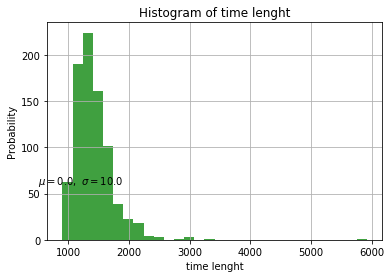

In [7]:
l= [len(x[i][0]) for i in range(len(x))]
# the histogram of the data
n, bins, patches = plt.hist(l, 30, density=False, facecolor='g', alpha=0.75)

mu = np.std(v)
sigma = np.average(v)
plt.xlabel('time lenght')
plt.ylabel('Probability')
plt.title('Histogram of time lenght')
plt.text(500, 60, r'$\mu='+str(np.trunc(mu))+',\ \sigma='+str(np.trunc(sigma))+'$')
plt.grid(True)
plt.show()

# build model function

In [8]:
def build_model(window_length,feature_length,n_class):
    input_signal = Input(shape=(feature_length,window_length),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=100,activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
#     x = LSTM(100, return_sequences=False)(x)
#     x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(n_class, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [9]:
# #normalize
# g=np.array([normalize(x[0]) for i in range(len(y))])
#padding
X=np.array([sequence.pad_sequences(b, padding="post",maxlen=2000,dtype='float32')for b in x])

# feature Selection

['Smooth-Ch0','Smooth-Ch1','Smooth-Ch2','Smooth-Ch3','Smooth-Ch4','Smooth-Ch5','Smooth-Ch6','Smooth-Ch7','ax','ay','az','gx','gy','gz']

In [10]:
X.shape

(832, 34, 2000)

In [11]:
Xf1=X[:,16:]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Xf1,y,test_size=0.5,stratify=y)

model=build_model(Xf1.shape[2],Xf1.shape[1],len(class_num))  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 10, nb_epoch = 100)


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/100
416/416 [==============================] - 3s 6ms/step - loss: 1.5870 - acc: 0.2476
Epoch 2/100
416/416 [==============================] - 0s 499us/step - loss: 1.4979 - acc: 0.3005
Epoch 3/100
416/416 [==============================] - 0s 487us/step - loss: 1.3848 - acc: 0.4038
Epoch 4/100
416/416 [==============================] - 0s 488us/step - loss: 1.2946 - acc: 0.4760
Epoch 5/100
416/416 [==============================] - 0s 484us/step - loss: 1.1168 - acc: 0.5673
Epoch 6/100
416/416 [==============================] - 0s 482us/step - loss: 1.0161 - acc: 0.5865
Epoch 7/100
416/416 [==============================] - 0s 480us/step - loss: 0.7272 - acc: 0.7019
Epoch 8/100
416/416 [==============================] - 0s 491us/step - loss: 0.5578 - acc: 0.7812
Epoch 9/100
416/416 [==============================] - 0s 489us/step - loss: 0.6090 - acc: 0.7692
Epoch 10/100
416/416 [==============================] - 0s 492us/step - loss: 0.4235 - acc: 0.8365
Epoch 11/100
416/416 

416/416 [==============================] - 0s 491us/step - loss: 9.0319e-05 - acc: 1.0000
Epoch 83/100
416/416 [==============================] - 0s 492us/step - loss: 8.5345e-05 - acc: 1.0000
Epoch 84/100
416/416 [==============================] - 0s 489us/step - loss: 8.2465e-05 - acc: 1.0000
Epoch 85/100
416/416 [==============================] - 0s 489us/step - loss: 7.8540e-05 - acc: 1.0000
Epoch 86/100
416/416 [==============================] - 0s 494us/step - loss: 7.4720e-05 - acc: 1.0000
Epoch 87/100
416/416 [==============================] - 0s 487us/step - loss: 7.1505e-05 - acc: 1.0000
Epoch 88/100
416/416 [==============================] - 0s 496us/step - loss: 6.9170e-05 - acc: 1.0000
Epoch 89/100
416/416 [==============================] - 0s 506us/step - loss: 6.5718e-05 - acc: 1.0000
Epoch 90/100
416/416 [==============================] - 0s 489us/step - loss: 6.2961e-05 - acc: 1.0000
Epoch 91/100
416/416 [==============================] - 0s 499us/step - loss: 6.0394e-

In [13]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

416/416 [==============================] - 0s 290us/step

acc: 92.55%


Confusion matrix, without normalization
[[73  0  4  0  4]
 [ 1 78  3  0  3]
 [ 3  2 80  1  0]
 [ 2  1  1 77  0]
 [ 0  2  1  3 77]]


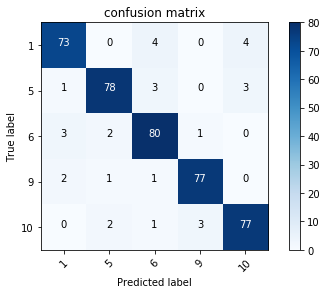

Normalized confusion matrix
[[0.9  0.   0.05 0.   0.05]
 [0.01 0.92 0.04 0.   0.04]
 [0.03 0.02 0.93 0.01 0.  ]
 [0.02 0.01 0.01 0.95 0.  ]
 [0.   0.02 0.01 0.04 0.93]]


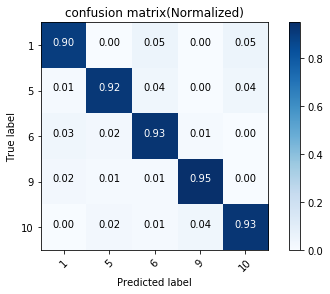

In [15]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)
prd[prd==4]=10
prd[prd==3]=9
prd[prd==2]=6
prd[prd==1]=5
prd[prd==0]=1
pr.confuse_matrix_plot(y_test,prd,class_num,title="confusion matrix")

Set2
[ 'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8','ax','ay','az','gx','gy','gz']

In [16]:
Xf2=X[:,[0,1,2,3,4,5,6,7,24,25,26,27,28,29,30,31,32,33]]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Xf2,y,test_size=0.5,stratify=y)

model=build_model(Xf2.shape[2],Xf2.shape[1],len(class_num) ) 
model.fit(X_train, pd.get_dummies(y_train), batch_size = 10, nb_epoch = 100)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/100
416/416 [==============================] - 1s 1ms/step - loss: 1.6028 - acc: 0.2356
Epoch 2/100
416/416 [==============================] - 0s 491us/step - loss: 1.3598 - acc: 0.4375
Epoch 3/100
416/416 [==============================] - 0s 491us/step - loss: 0.9861 - acc: 0.5865
Epoch 4/100
416/416 [==============================] - 0s 506us/step - loss: 0.7423 - acc: 0.7909
Epoch 5/100
416/416 [==============================] - 0s 489us/step - loss: 0.3587 - acc: 0.8822
Epoch 6/100
416/416 [==============================] - 0s 494us/step - loss: 0.1762 - acc: 0.9471
Epoch 7/100
416/416 [==============================] - 0s 503us/step - loss: 0.0472 - acc: 0.9832
Epoch 8/100
416/416 [==============================] - 0s 491us/step - loss: 0.0510 - acc: 0.9808
Epoch 9/100
416/416 [==============================] - 0s 499us/step - loss: 0.1556 - acc: 0.9687
Epoch 10/100
416/416 [==============================] - 0s 494us/step - loss: 0.3131 - acc: 0.9303
Epoch 11/100
416/416 

416/416 [==============================] - 0s 494us/step - loss: 0.0388 - acc: 0.9976
Epoch 84/100
416/416 [==============================] - 0s 494us/step - loss: 0.0388 - acc: 0.9976
Epoch 85/100
416/416 [==============================] - 0s 501us/step - loss: 0.0388 - acc: 0.9976
Epoch 86/100
416/416 [==============================] - 0s 496us/step - loss: 0.0388 - acc: 0.9976
Epoch 87/100
416/416 [==============================] - 0s 491us/step - loss: 0.0388 - acc: 0.9976
Epoch 88/100
416/416 [==============================] - 0s 494us/step - loss: 0.0388 - acc: 0.9976
Epoch 89/100
416/416 [==============================] - 0s 492us/step - loss: 0.0388 - acc: 0.9976
Epoch 90/100
416/416 [==============================] - 0s 491us/step - loss: 0.0388 - acc: 0.9976
Epoch 91/100
416/416 [==============================] - 0s 494us/step - loss: 0.0388 - acc: 0.9976
Epoch 92/100
416/416 [==============================] - 0s 491us/step - loss: 0.0388 - acc: 0.9976
Epoch 93/100
416/416 [=

In [18]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

416/416 [==============================] - 0s 276us/step

acc: 26.68%


Confusion matrix, without normalization
[[32 11 17 11 11]
 [21 21 13 12 17]
 [24 21 14  9 17]
 [26 13  8 23 11]
 [18 11 17 17 21]]


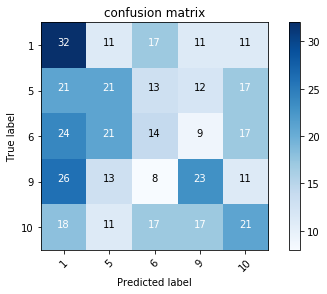

Normalized confusion matrix
[[0.39 0.13 0.21 0.13 0.13]
 [0.25 0.25 0.15 0.14 0.2 ]
 [0.28 0.25 0.16 0.11 0.2 ]
 [0.32 0.16 0.1  0.28 0.14]
 [0.21 0.13 0.2  0.2  0.25]]


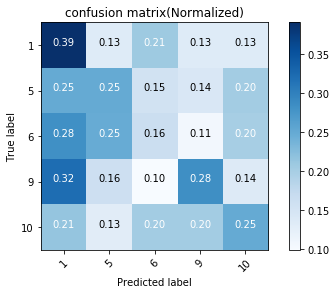

In [20]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)
prd[prd==4]=10
prd[prd==3]=9
prd[prd==2]=6
prd[prd==1]=5
prd[prd==0]=1
pr.confuse_matrix_plot(y_test,prd,class_num,title="confusion matrix")

Set3 [ 'Rect-Ch0','Rect-Ch1','Rect-Ch2','Rect-Ch3','Rect-Ch4','Rect-Ch5','Rect-Ch6','Rect-Ch7','ax','ay','az','gx','gy','gz']

In [22]:
Xf3=X[:,[8,9,10,11,12,13,14,15,24,25,26,27,28,29,30,31,32,33]]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Xf3,y,test_size=0.5,stratify=y)

model=build_model(Xf3.shape[2],Xf3.shape[1],len(class_num))  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 10, nb_epoch = 60)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/60
416/416 [==============================] - 1s 1ms/step - loss: 1.5875 - acc: 0.2524
Epoch 2/60
416/416 [==============================] - 0s 492us/step - loss: 1.4984 - acc: 0.3990
Epoch 3/60
416/416 [==============================] - 0s 496us/step - loss: 1.3685 - acc: 0.4567
Epoch 4/60
416/416 [==============================] - 0s 501us/step - loss: 1.1878 - acc: 0.5529
Epoch 5/60
416/416 [==============================] - 0s 499us/step - loss: 0.9885 - acc: 0.5841
Epoch 6/60
416/416 [==============================] - 0s 489us/step - loss: 0.7689 - acc: 0.7212
Epoch 7/60
416/416 [==============================] - 0s 492us/step - loss: 0.6476 - acc: 0.7812
Epoch 8/60
416/416 [==============================] - 0s 496us/step - loss: 0.5352 - acc: 0.8269
Epoch 9/60
416/416 [==============================] - 0s 492us/step - loss: 0.3990 - acc: 0.8894
Epoch 10/60
416/416 [==============================] - 0s 492us/step - loss: 0.4167 - acc: 0.8846
Epoch 11/60
416/416 [==========

In [24]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

416/416 [==============================] - 0s 297us/step

acc: 78.85%


Confusion matrix, without normalization
[[72  0  3  2  4]
 [ 5 66  8  0  6]
 [14  2 67  1  1]
 [ 6  0  8 67  0]
 [15 11  2  0 56]]


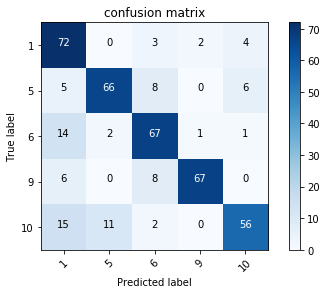

Normalized confusion matrix
[[0.89 0.   0.04 0.02 0.05]
 [0.06 0.78 0.09 0.   0.07]
 [0.16 0.02 0.79 0.01 0.01]
 [0.07 0.   0.1  0.83 0.  ]
 [0.18 0.13 0.02 0.   0.67]]


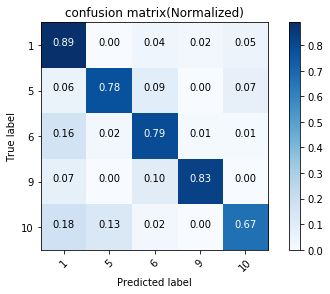

In [25]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)
prd[prd==4]=10
prd[prd==3]=9
prd[prd==2]=6
prd[prd==1]=5
prd[prd==0]=1
pr.confuse_matrix_plot(y_test,prd,class_num,title="confusion matrix")

Set5 [ 'Rect-Ch0','Rect-Ch1','Rect-Ch2','Rect-Ch3','Rect-Ch4','Rect-Ch5','Rect-Ch6','Rect-Ch7','Smooth-Ch0','Smooth-Ch1','Smooth-Ch2','Smooth-Ch3','Smooth-Ch4','Smooth-Ch5','Smooth-Ch6','Smooth-Ch7','ax','ay','az','gx','gy','gz']

In [26]:
Xf4=X[:,8:]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Xf4,y,test_size=0.5,stratify=y)

model=build_model(Xf4.shape[2],Xf4.shape[1],len(class_num))  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 10, nb_epoch = 100)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/100
416/416 [==============================] - 1s 2ms/step - loss: 1.5876 - acc: 0.2572
Epoch 2/100
416/416 [==============================] - 0s 535us/step - loss: 1.5180 - acc: 0.2837
Epoch 3/100
416/416 [==============================] - 0s 535us/step - loss: 1.4200 - acc: 0.3702
Epoch 4/100
416/416 [==============================] - 0s 539us/step - loss: 1.3295 - acc: 0.4495
Epoch 5/100
416/416 [==============================] - 0s 563us/step - loss: 1.2583 - acc: 0.5168
Epoch 6/100
416/416 [==============================] - 0s 539us/step - loss: 1.0576 - acc: 0.5649
Epoch 7/100
416/416 [==============================] - 0s 532us/step - loss: 0.9584 - acc: 0.6154
Epoch 8/100
416/416 [==============================] - 0s 549us/step - loss: 0.7400 - acc: 0.7308
Epoch 9/100
416/416 [==============================] - 0s 537us/step - loss: 0.5356 - acc: 0.7788
Epoch 10/100
416/416 [==============================] - 0s 537us/step - loss: 0.6040 - acc: 0.7668
Epoch 11/100
416/416 

416/416 [==============================] - 0s 568us/step - loss: 3.9225e-05 - acc: 1.0000
Epoch 82/100
416/416 [==============================] - 0s 535us/step - loss: 3.7623e-05 - acc: 1.0000
Epoch 83/100
416/416 [==============================] - 0s 532us/step - loss: 3.6278e-05 - acc: 1.0000
Epoch 84/100
416/416 [==============================] - 0s 539us/step - loss: 3.5076e-05 - acc: 1.0000
Epoch 85/100
416/416 [==============================] - 0s 535us/step - loss: 3.3652e-05 - acc: 1.0000
Epoch 86/100
416/416 [==============================] - 0s 537us/step - loss: 3.2576e-05 - acc: 1.0000
Epoch 87/100
416/416 [==============================] - 0s 532us/step - loss: 3.1388e-05 - acc: 1.0000
Epoch 88/100
416/416 [==============================] - 0s 549us/step - loss: 3.0258e-05 - acc: 1.0000
Epoch 89/100
416/416 [==============================] - 0s 537us/step - loss: 2.9311e-05 - acc: 1.0000
Epoch 90/100
416/416 [==============================] - 0s 537us/step - loss: 2.8211e-

In [28]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

416/416 [==============================] - 0s 460us/step

acc: 81.73%


Confusion matrix, without normalization
[[73  2  4  1  1]
 [ 1 74  1  0  8]
 [ 8  5 68  1  4]
 [ 7  4 10 57  3]
 [10  5  1  0 68]]


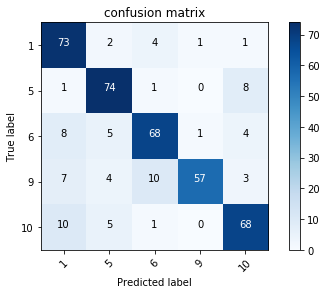

Normalized confusion matrix
[[0.9  0.02 0.05 0.01 0.01]
 [0.01 0.88 0.01 0.   0.1 ]
 [0.09 0.06 0.79 0.01 0.05]
 [0.09 0.05 0.12 0.7  0.04]
 [0.12 0.06 0.01 0.   0.81]]


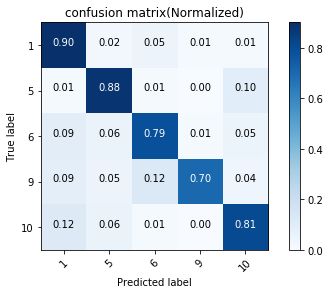

In [30]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)
prd[prd==4]=10
prd[prd==3]=9
prd[prd==2]=6
prd[prd==1]=5
prd[prd==0]=1
pr.confuse_matrix_plot(y_test,prd,class_num,title="confusion matrix")

# loss activation

In [31]:
def build_model(window_length,feature_length,n_class):
    input_signal = Input(shape=(feature_length,window_length),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=100,activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
#     x = LSTM(100, return_sequences=False)(x)
#     x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(n_class, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Xf1,y,test_size=0.5,stratify=y)

model=build_model(Xf1.shape[2],Xf1.shape[1],len(class_num))  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 10, nb_epoch = 100)


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/100
416/416 [==============================] - 1s 1ms/step - loss: 0.1868 - acc: 0.2019
Epoch 2/100
416/416 [==============================] - 0s 475us/step - loss: 0.1728 - acc: 0.2452
Epoch 3/100
416/416 [==============================] - 0s 477us/step - loss: 0.1580 - acc: 0.4207
Epoch 4/100
416/416 [==============================] - 0s 477us/step - loss: 0.1411 - acc: 0.4519
Epoch 5/100
416/416 [==============================] - 0s 496us/step - loss: 0.1326 - acc: 0.5216
Epoch 6/100
416/416 [==============================] - 0s 472us/step - loss: 0.1355 - acc: 0.5072
Epoch 7/100
416/416 [==============================] - 0s 477us/step - loss: 0.1200 - acc: 0.5529
Epoch 8/100
416/416 [==============================] - 0s 520us/step - loss: 0.1059 - acc: 0.6418
Epoch 9/100
416/416 [==============================] - 0s 477us/step - loss: 0.0878 - acc: 0.7067
Epoch 10/100
416/416 [==============================] - 0s 479us/step - loss: 0.0771 - acc: 0.7524
Epoch 11/100
416/416 

416/416 [==============================] - 0s 475us/step - loss: 9.6688e-04 - acc: 0.9976
Epoch 80/100
416/416 [==============================] - 0s 480us/step - loss: 9.6667e-04 - acc: 0.9976
Epoch 81/100
416/416 [==============================] - 0s 496us/step - loss: 9.6643e-04 - acc: 0.9976
Epoch 82/100
416/416 [==============================] - 0s 472us/step - loss: 9.6626e-04 - acc: 0.9976
Epoch 83/100
416/416 [==============================] - 0s 484us/step - loss: 9.6606e-04 - acc: 0.9976
Epoch 84/100
416/416 [==============================] - 0s 475us/step - loss: 9.6588e-04 - acc: 0.9976
Epoch 85/100
416/416 [==============================] - 0s 475us/step - loss: 9.6573e-04 - acc: 0.9976
Epoch 86/100
416/416 [==============================] - 0s 484us/step - loss: 9.6558e-04 - acc: 0.9976
Epoch 87/100
416/416 [==============================] - 0s 480us/step - loss: 9.6543e-04 - acc: 0.9976
Epoch 88/100
416/416 [==============================] - 0s 477us/step - loss: 9.6527e-

In [33]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

416/416 [==============================] - 0s 364us/step

acc: 92.79%


Confusion matrix, without normalization
[[79  0  2  0  0]
 [ 1 81  0  0  3]
 [ 6  2 75  2  1]
 [ 0  0  1 79  1]
 [ 1  7  3  0 72]]


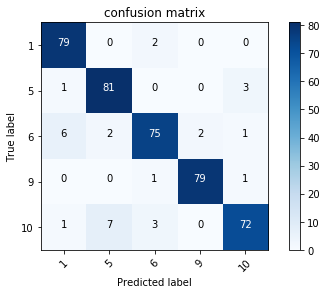

Normalized confusion matrix
[[0.98 0.   0.02 0.   0.  ]
 [0.01 0.95 0.   0.   0.04]
 [0.07 0.02 0.87 0.02 0.01]
 [0.   0.   0.01 0.98 0.01]
 [0.01 0.08 0.04 0.   0.87]]


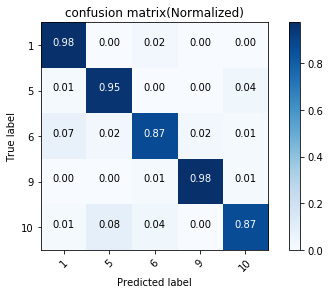

In [34]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)
prd[prd==4]=10
prd[prd==3]=9
prd[prd==2]=6
prd[prd==1]=5
prd[prd==0]=1
pr.confuse_matrix_plot(y_test,prd,class_num,title="confusion matrix")